3. Integrate the master equation for enough large times to find the steady state. What is the
mean photon number ⟨ˆ
a†ˆ
a⟩? What is the steady-state occupation of the n-photon states?
Can you recover a coherent state distribution? [Suggestion: keep the photon Hilbert space
sufficiently small]

Mean photon number: 0.3024734326635325
Photon state probabilities: [0.7389774306842085, 0.22353624489256174, 0.03380764309529433, 0.0034074613823051056, 0.0002565822946840216, 1.463765094614178e-05]
Parametro di Poisson dal fit (lambda): 0.30249054742687825
Varianza (uguale a lambda): 0.30249054742687825


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
/var/folders/9p/sxfs2z3j2ln1p3kz5qdq03_w0000gn/T/ipykernel_6860/2538580222.py:64: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  ideal_distribution = [np.exp(-mean_photon_number) * (mean_photon_number ** n) / np.math.factorial(n) for n in range(N)]


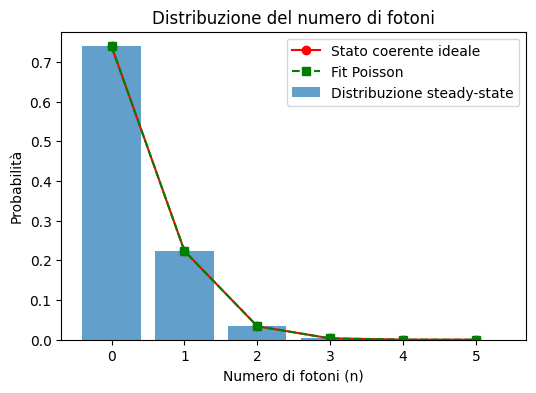

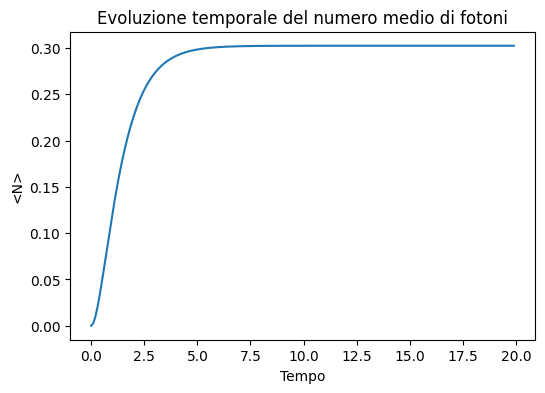

In [2]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial  # Usata per vettorializzare il fattoriale
from scipy.stats import poisson

# Parameters
N = 6  # Truncated photon Hilbert space
Delta_c = 0.0  # Detuning of the cavity (omega_c - omega)
Delta_a = 0.0  # Detuning of the atom (omega_a - omega)
g = 0.0  # Coupling strength

kappa = 2.  # Cavity decay rate
gamma = 3.  # Atomic decay rate
E = 0.55    # Driving amplitude

# Operators
a = destroy(N)       # Cavity annihilation operator
adag = a.dag()       # Cavity creation operator
sigma_minus = sigmam()  # Atomic lowering operator
sigma_plus = sigmap()   # Atomic raising operator

# Tensor operators
a_full = tensor(qeye(2), a)      # Cavity operator in full space
adag_full = tensor(qeye(2), adag)
sigma_minus_full = tensor(sigma_minus, qeye(N))  # Atomic operator in full space
sigma_plus_full = tensor(sigma_plus, qeye(N))

# Hamiltonian in RWA
H = (Delta_c * (adag_full * a_full) +
     Delta_a * (sigma_plus_full * sigma_minus_full) +
     g * (sigma_plus_full * a_full + sigma_minus_full * adag_full) +
     E * (a_full + adag_full))

EigVal, EigVec = H.eigenstates()

# Collapse operators
collapse_ops = [
    np.sqrt(kappa) * a_full,         # Cavity decay
    np.sqrt(gamma) * sigma_minus_full  # Atomic decay
]

# Initial state: atom in ground state, cavity in vacuum
psi0 = tensor(fock(2, 0), fock(N, 0))

# Solve the master equation
dt = 0.1
times = np.arange(0, 20, dt)  # Time range
result = mesolve(H, psi0, times, collapse_ops, [adag_full * a_full])

# Steady state
rho_ss = steadystate(H, collapse_ops)

# Mean photon number
mean_photon_number = expect(adag_full * a_full, rho_ss)
print("Mean photon number:", mean_photon_number)

# Steady-state occupation probabilities per photon number (tracciando il sottospazio del campo)
photon_distribution = [rho_ss.ptrace(1).diag()[n] for n in range(N)]
print("Photon state probabilities:", photon_distribution)

# Calcolo della distribuzione di Poisson teorica (stato coerente ideale)
ideal_distribution = [np.exp(-mean_photon_number) * (mean_photon_number ** n) / np.math.factorial(n) for n in range(N)]

# Definizione della funzione di Poisson per il fit
def poisson_pmf(n, lam):
    # Uso scipy.special.factorial che gestisce array
    return np.exp(-lam) * (lam ** n) / factorial(n)

# Fit dell'istogramma ottenuto (photon_distribution) con una distribuzione di Poisson
n_vals = np.arange(N)
# p0 è il valore iniziale, in questo caso usiamo mean_photon_number
popt, pcov = curve_fit(poisson_pmf, n_vals, photon_distribution, p0=[mean_photon_number])
lam_fit = popt[0]
print("Parametro di Poisson dal fit (lambda):", lam_fit)
print("Varianza (uguale a lambda):", lam_fit)

# Plot della distribuzione dei numeri di fotoni
plt.figure(figsize=(6, 4))
plt.bar(n_vals, photon_distribution, alpha=0.7, label="Distribuzione steady-state")
plt.plot(n_vals, ideal_distribution, 'o-', c="red", label="Stato coerente ideale")
plt.plot(n_vals, poisson_pmf(n_vals, lam_fit), 's--', c="green", label="Fit Poisson")
plt.xlabel("Numero di fotoni (n)")
plt.ylabel("Probabilità")
plt.title("Distribuzione del numero di fotoni")
plt.legend()
plt.show()

# Plot dell'evoluzione temporale del numero medio di fotoni
plt.figure(figsize=(6, 4))
plt.plot(times, result.expect[0])
plt.xlabel("Tempo")
plt.ylabel("<N>")
plt.title("Evoluzione temporale del numero medio di fotoni")
plt.show()


In [3]:
N = 50  # Truncated photon Hilbert space
Delta_c = 0.0  # Detuning of the cavity (omega_c - omega)
Delta_a = 0.0  # Detuning of the atom (omega_a - omega)
g = 0.0  # Coupling strength

kappa = 0.2  # Cavity decay rate
gamma = 0.3  # Atomic decay rate
E = 0.55 # Driving amplitude


Con la nostra scelta dei parametri i fotoni non riescono a stare dentro e c'è una grande probabilità che escano (n=0)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


Mean photon number: 30.02061243625241
Photon state probabilities: [0.00015704439728704263, 0.00016284174296826473, 0.0001691057249157348, 0.00017589896791564278, 0.0001832981261241572, 0.00019140340806099915, 0.00020036696981573735, 0.00021047850885357286, 0.00022240295223367206, 0.00023777089223526242, 0.00026048182151655624, 0.0002992567114477099, 0.00037206368719519013, 0.0005128596355925846, 0.0007804466215517532, 0.0012680506017992824, 0.0021106737143423027, 0.003485889916700181, 0.005603356594734935, 0.008679672932409475, 0.012898617746521752, 0.018361687407491983, 0.025038786036440056, 0.03273197940553743, 0.04106477607260654, 0.049504868996855904, 0.05742055907230543, 0.06416237632082554, 0.06915443330107222, 0.0719770295200857, 0.07242391305692142, 0.07052372963538457, 0.06652359594360724, 0.060840940182399016, 0.053995608507135834, 0.046536554459025894, 0.03897619503084947, 0.03174167968670931, 0.025147317348631654, 0.019387656372337282, 0.014547221349706218, 0.01062111450130

/var/folders/9p/sxfs2z3j2ln1p3kz5qdq03_w0000gn/T/ipykernel_6860/1175616441.py:56: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  ideal_distribution = [np.exp(-mean_photon_number) * (mean_photon_number ** n) / np.math.factorial(n) for n in range(N)]


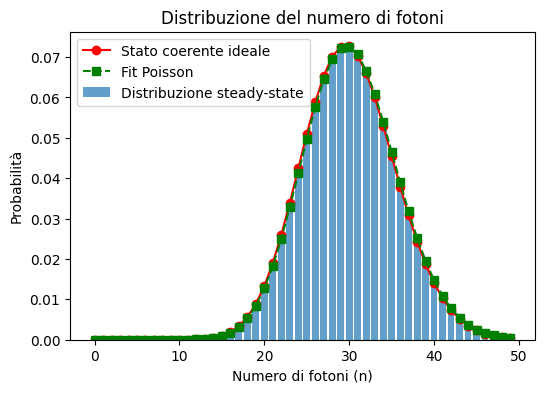

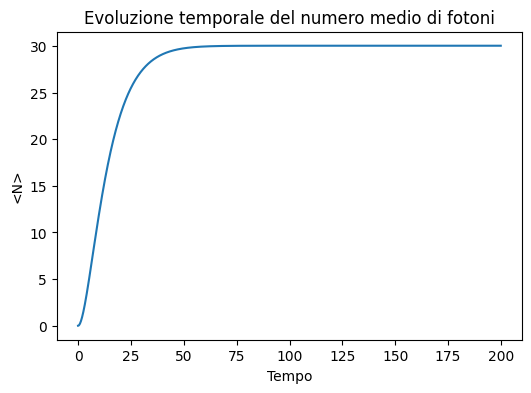

In [4]:

N = 50  # Truncated photon Hilbert space
Delta_c = 0.0  # Detuning of the cavity (omega_c - omega)
Delta_a = 0.0  # Detuning of the atom (omega_a - omega)
g = 0.0  # Coupling strength

kappa = 0.2  # Cavity decay rate
gamma = 0.3  # Atomic decay rate
E = 0.55 # Driving amplitude

# Operators
a = destroy(N)       # Cavity annihilation operator
adag = a.dag()       # Cavity creation operator
sigma_minus = sigmam()  # Atomic lowering operator
sigma_plus = sigmap()   # Atomic raising operator

# Tensor operators
a_full = tensor(qeye(2), a)      # Cavity operator in full space
adag_full = tensor(qeye(2), adag)
sigma_minus_full = tensor(sigma_minus, qeye(N))  # Atomic operator in full space
sigma_plus_full = tensor(sigma_plus, qeye(N))

# Hamiltonian in RWA
H = (Delta_c * (adag_full * a_full) +
     Delta_a * (sigma_plus_full * sigma_minus_full) +
     g * (sigma_plus_full * a_full + sigma_minus_full * adag_full) +
     E * (a_full + adag_full))

EigVal, EigVec = H.eigenstates()

# Collapse operators
collapse_ops = [
    np.sqrt(kappa) * a_full,         # Cavity decay
    np.sqrt(gamma) * sigma_minus_full  # Atomic decay
]

# Initial state: atom in ground state, cavity in vacuum
psi0 = tensor(fock(2, 0), fock(N, 0))

# Solve the master equation
dt = 0.1
times = np.arange(0, 200, dt)  # Time range
result = mesolve(H, psi0, times, collapse_ops, [adag_full * a_full])

# Steady state
rho_ss = steadystate(H, collapse_ops)

# Mean photon number
mean_photon_number = expect(adag_full * a_full, rho_ss)
print("Mean photon number:", mean_photon_number)

# Steady-state occupation probabilities per photon number (tracciando il sottospazio del campo)
photon_distribution = [rho_ss.ptrace(1).diag()[n] for n in range(N)]
print("Photon state probabilities:", photon_distribution)

# Calcolo della distribuzione di Poisson teorica (stato coerente ideale)
ideal_distribution = [np.exp(-mean_photon_number) * (mean_photon_number ** n) / np.math.factorial(n) for n in range(N)]

# Definizione della funzione di Poisson per il fit
def poisson_pmf(n, lam):
    # Uso scipy.special.factorial che gestisce array
    return np.exp(-lam) * (lam ** n) / factorial(n)

# Fit dell'istogramma ottenuto (photon_distribution) con una distribuzione di Poisson
n_vals = np.arange(N)
# p0 è il valore iniziale, in questo caso usiamo mean_photon_number
popt, pcov = curve_fit(poisson_pmf, n_vals, photon_distribution, p0=[mean_photon_number])
lam_fit = popt[0]
print("Parametro di Poisson dal fit (lambda):", lam_fit)
print("Varianza (uguale a lambda):", lam_fit)

# Plot della distribuzione dei numeri di fotoni
plt.figure(figsize=(6, 4))
plt.bar(n_vals, photon_distribution, alpha=0.7, label="Distribuzione steady-state")
plt.plot(n_vals, ideal_distribution, 'o-', c="red", label="Stato coerente ideale")
plt.plot(n_vals, poisson_pmf(n_vals, lam_fit), 's--', c="green", label="Fit Poisson")
plt.xlabel("Numero di fotoni (n)")
plt.ylabel("Probabilità")
plt.title("Distribuzione del numero di fotoni")
plt.legend()
plt.show()

# Plot dell'evoluzione temporale del numero medio di fotoni
plt.figure(figsize=(6, 4))
plt.plot(times, result.expect[0])
plt.xlabel("Tempo")
plt.ylabel("<N>")
plt.title("Evoluzione temporale del numero medio di fotoni")
plt.show()


4. In the presence of a coupling ˜ g, the previous resonance condition is not valid anymore. Set
ω to resonance with the lowest (one-photon) dressed state of the Jaynes-Cummings model
and find again the steady state in the strong-coupling condition ˜ g ≫Γ,κ and weak drive
E. How important is the value of the pumping strength E? (Be careful that increasing E
too much could lead to instability/bistability)

In [5]:
g = 20  # Accoppiamento forte
omega_c = 10.0  # Frequenza cavità
omega_a = 10.0  # Frequenza atomo

# Delta = -15.2  # Detuning
Delta = omega_c - omega_a
# omega_drive = omega_c - ( np.sqrt(g**2 + (Delta / 2)**2))  # Risonanza dressed state
omega_drive = omega_c - g

kappa = 2.  # Decadimento cavità
gamma = 3.  # Decadimento atomo
E = 0.55  # Weak drive

N=5

# Operators
a = destroy(N)       # Cavity annihilation operator
adag = a.dag()       # Cavity creation operator
sigma_minus = sigmam()  # Atomic lowering operator
sigma_plus = sigmap()   # Atomic raising operator

# Tensor operators
a_full = tensor(qeye(2), a)      # Cavity operator in full space
adag_full = tensor(qeye(2), adag)
sigma_minus_full = tensor(sigma_minus, qeye(N))  # Atomic operator in full space
sigma_plus_full = tensor(sigma_plus, qeye(N))

# Collapse operators
collapse_ops = [
    np.sqrt(kappa) * a_full,         # Cavity decay
    np.sqrt(gamma) * sigma_minus_full  # Atomic decay
]

# Initial state: atom in ground state, cavity in vacuum
psi0 = tensor(fock(2, 0), fock(N, 0))

In [6]:
# Define the full Hamiltonian
def H(Delta_c, Delta_a, g, E):
     
    Hamiltonian = (Delta_c) * (adag_full * a_full) + (Delta_a) * (sigma_plus_full * sigma_minus_full) \
    + g * (sigma_plus_full * a_full + sigma_minus_full * adag_full) \
    + E * (a_full + adag_full)

    return Hamiltonian

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


Mean photon number: 0.041220652938418076
Photon state probabilities: [0.958912899865941, 0.04095370267948675, 0.00013324220641044404, 1.5514653702263433e-07, 1.016248411607239e-10]


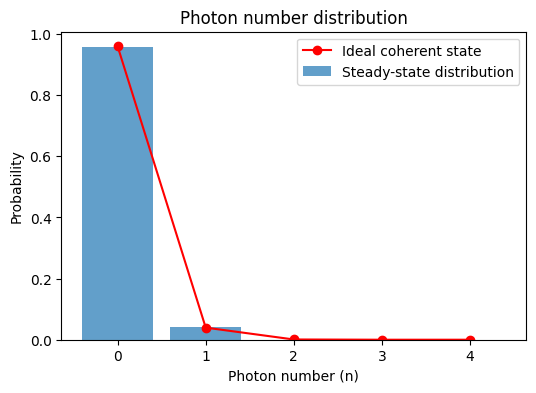

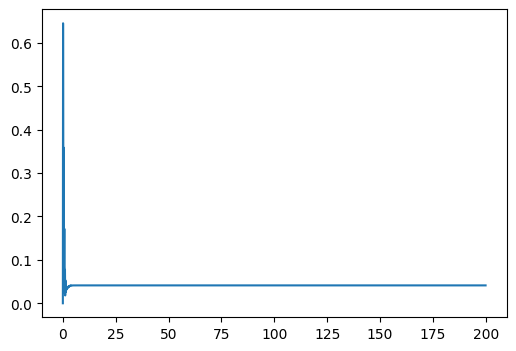

In [7]:
# Set omega to resonance with the lowest dressed state
Delta_c = omega_c - omega_drive
Delta_a = omega_a - omega_drive

# Define the new Hamiltonian
H = H(Delta_c, Delta_a, g, E)

# Solve the corresponding master equation
result = mesolve(H, psi0, times, collapse_ops, [adag_full*a_full])
# Steady state
rho_ss = steadystate(H, collapse_ops)

# Mean photon number
mean_photon_number = expect(adag_full * a_full, rho_ss)
print("Mean photon number:", mean_photon_number)

# Steady-state occupation probabilities
photon_distribution = [rho_ss.ptrace(1).diag()[n] for n in range(N)]
print("Photon state probabilities:", photon_distribution)

# Coherent state distribution (for comparison)
coherent_amplitude = np.sqrt(mean_photon_number)
ideal_distribution = [np.abs(poisson.pmf(n, coherent_amplitude**2)) for n in range(N)]
#ideal_distribution = [np.exp(-mean_photon_number) * (mean_photon_number ** n) / factorial(n) for n in range(N)]

# Plot the photon number distribution
plt.figure(figsize=(6, 4))
plt.bar(range(N), photon_distribution, alpha=0.7, label="Steady-state distribution")
plt.plot(range(N), ideal_distribution, 'o-', c="red", label="Ideal coherent state")
plt.xlabel("Photon number (n)")
plt.ylabel("Probability")
plt.title("Photon number distribution")
plt.legend()
plt.show()

# Plot the master equation
plt.figure(figsize=(6, 4))
plt.plot(times, result.expect[0])
plt.show()

In [8]:
"""E_amplitudes = np.array([e for e in np.arange(0, 300, 2)])

photon_numbers = np.array([])

for e in E_amplitudes:

    Ham = (Delta_c) * (adag_full * a_full) + (Delta_a) * (sigma_plus_full * sigma_minus_full) \
    + g * (sigma_plus_full * a_full + sigma_minus_full * adag_full) \
    + e * (a_full + adag_full)

    # Steady state
    rho_ss = steadystate(Ham, collapse_ops)

    # Mean photon number
    mean_photon_number = expect(adag_full * a_full, rho_ss)
    photon_numbers = np.append(photon_numbers, mean_photon_number)

# Plot
    
plt.figure(figsize=(6, 4))
plt.axhline(2, c="red")
plt.scatter(E_amplitudes, photon_numbers)
plt.xlabel("Drive amplitude")
plt.ylabel("Mean photon number")
plt.show()"""

'E_amplitudes = np.array([e for e in np.arange(0, 300, 2)])\n\nphoton_numbers = np.array([])\n\nfor e in E_amplitudes:\n\n    Ham = (Delta_c) * (adag_full * a_full) + (Delta_a) * (sigma_plus_full * sigma_minus_full)     + g * (sigma_plus_full * a_full + sigma_minus_full * adag_full)     + e * (a_full + adag_full)\n\n    # Steady state\n    rho_ss = steadystate(Ham, collapse_ops)\n\n    # Mean photon number\n    mean_photon_number = expect(adag_full * a_full, rho_ss)\n    photon_numbers = np.append(photon_numbers, mean_photon_number)\n\n# Plot\n    \nplt.figure(figsize=(6, 4))\nplt.axhline(2, c="red")\nplt.scatter(E_amplitudes, photon_numbers)\nplt.xlabel("Drive amplitude")\nplt.ylabel("Mean photon number")\nplt.show()'

Shape di z: (20, 20)


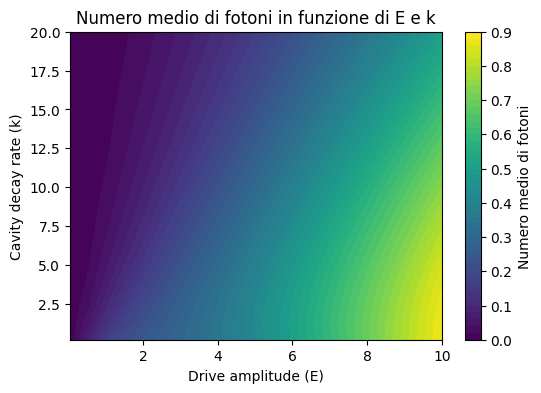

In [22]:
# Definiamo i range per E e k
E_values = np.linspace(0.05, 10, 20)
k_values = np.linspace(0.2, 20, 20)

# Creiamo la griglia
X, Y = np.meshgrid(E_values, k_values)

# Matrice per salvare i valori del numero medio di fotoni
z = []

# Ciclo sui valori di k (decay rate) e E (drive amplitude)
for k in k_values:
    zz = []
    for E in E_values:
        # Costruiamo l'Hamiltoniana per il dato valore di E
        Hamiltonian = (Delta_c) * (adag_full * a_full) + (Delta_a) * (sigma_plus_full * sigma_minus_full) \
                      + g * (sigma_plus_full * a_full + sigma_minus_full * adag_full) \
                      + E * (a_full + adag_full)

        # Definiamo i collapse operators con il tasso di decadimento k per il campo
        collapse_ops = [
            np.sqrt(k) * a_full,              # Decadimento del campo
            np.sqrt(gamma) * sigma_minus_full   # Decadimento atomico
        ]

        # Calcoliamo lo stato stazionario e l'aspettazione del numero di fotoni
        rho_ss = steadystate(Hamiltonian, collapse_ops)
        exp_val = expect(adag_full * a_full, rho_ss)
        zz.append(exp_val)
    z.append(zz)

# Convertiamo z in un array NumPy
z = np.array(z)
print("Shape di z:", z.shape)  # Dovrebbe essere (len(k_values), len(E_values))

# Creiamo il plot a contorni
plt.figure(figsize=(6, 4))
# Utilizziamo l'extent per mappare correttamente le coordinate degli assi
plt.contourf(X, Y, z, levels=50, cmap='viridis')
plt.colorbar(label='Numero medio di fotoni')
plt.xlabel("Drive amplitude (E)")
plt.ylabel("Cavity decay rate (k)")
plt.title("Numero medio di fotoni in funzione di E e k")
plt.show()

A way to understand the suppression of two-photon states is to compute the two-photon
correlation function g(2) ≡⟨ˆ
a†ˆ
a†ˆ
aˆ
a⟩/|⟨ˆ
a†ˆ
a⟩|2, which compares the probability to find two
simultaneous photons with the one of having to independent photons at random. In the
blockade regime, you should find g(2) <1.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


g2(0): 0.7372406905031048
g2(0): 0.7372406905031048


/var/folders/9p/sxfs2z3j2ln1p3kz5qdq03_w0000gn/T/ipykernel_6819/2789187199.py:35: RuntimeWarning: invalid value encountered in divide
  g2 = num/den


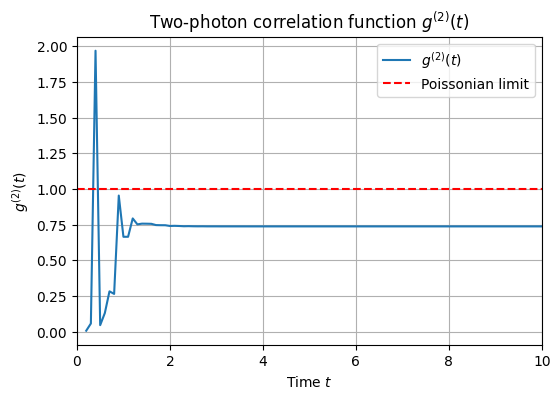

In [ ]:
# Two-photon correlation function
dt=0.1
times = np.arange(dt, 2000, dt)

# Full Hamiltonian
def H(Delta_c, Delta_a, g, E):
     
    Hamiltonian = (Delta_c) * (adag_full * a_full) + (Delta_a) * (sigma_plus_full * sigma_minus_full) \
    + g * (sigma_plus_full * a_full + sigma_minus_full * adag_full) \
    + E * (a_full + adag_full)

    return Hamiltonian

# Collapse operators
collapse_ops = [
    kappa * a_full,  # Cavity decay
    gamma * sigma_minus_full  # Atomic decay
]

# Define the new Hamiltonian
H = H(Delta_c, Delta_a, g, E)

# Solve the corresponding master equation
result = mesolve(H, psi0, times, collapse_ops, [adag_full*a_full, adag_full*adag_full*a_full*a_full])
result2 = mesolve(H, psi0, times, collapse_ops)

# Get the teady state from the master equation
rho_ss = result2.states[-1]
g2_zero = expect(adag_full*adag_full*a_full*a_full, rho_ss) / expect(adag_full*a_full, rho_ss)**2
print("g2(0):", g2_zero)

# Compute the two photon correlation function
num = result.expect[1]
den = np.abs(result.expect[0])**2
g2 = num/den
print("g2(0):", g2[-1])

# Plot of g^(2)(t)
plt.figure(figsize=(6, 4))
plt.plot(times, g2, label=r"$g^{(2)}(t)$")
plt.axhline(1, color="red", linestyle="--", label="Poissonian limit")
plt.xlabel("Time $t$")
plt.ylabel(r"$g^{(2)}(t)$")
plt.legend()
plt.grid()
#plt.ylim(0,1)
plt.xlim(0, 10)
plt.title("Two-photon correlation function $g^{(2)}(t)$")
plt.show()

/var/folders/9p/sxfs2z3j2ln1p3kz5qdq03_w0000gn/T/ipykernel_6819/953544733.py:63: RuntimeWarning: invalid value encountered in divide
  g2_t = mean_a_dag_a_dag_a_a / (mean_a_dag_a ** 2)  # g^(2)(t)


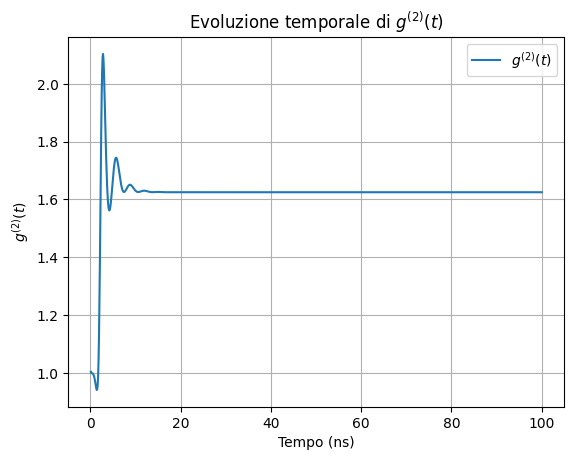

In [ ]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

# Parametri normalizzati
omega_c = 1.0  # Frequenza cavità (adimensionale)
omega_a = 0.98  # Frequenza atomo (adimensionale)
g = 1.0  # Accoppiamento atomo-cavità (adimensionale)
kappa = 1.0  # Decadimento cavità (adimensionale)
gamma = 1.0  # Decadimento atomico (adimensionale)
E = 0.1 * kappa  # Ampiezza del campo di driving (adimensionale)
N = 5  # Dimensione dello spazio di Fock

# Detuning
Delta = omega_a - omega_c  # Detuning (adimensionale)

# Frequenza di guida risonante con il dressed state
omega_drive = omega_c + (Delta / 2 - np.sqrt(g**2 + (Delta / 2)**2))  # Adimensionale

# Operatori
a = qt.destroy(N)  # Operatore di distruzione per la cavità
adag = a.dag()  # Operatore di creazione per la cavità
sigma_minus = qt.destroy(2)  # Operatore di lowering atomico
sigma_plus = sigma_minus.dag()

# Operatori nel sistema composito (atomo + cavità)
a_full = qt.tensor(qt.qeye(2), a)  # Operatore di distruzione per la cavità
adag_full = a_full.dag()  # Operatore di creazione per la cavità
sigma_minus_full = qt.tensor(sigma_minus, qt.qeye(N))  # Operatore di lowering atomico
sigma_plus_full = sigma_minus_full.dag()

# Hamiltoniana
def H(Delta_c, Delta_a, g, E):
    return (Delta_c) * (adag_full * a_full) + (Delta_a) * (sigma_plus_full * sigma_minus_full) \
           + g * (sigma_plus_full * a_full + sigma_minus_full * adag_full) \
           + E * (a_full + adag_full)

# Hamiltoniana con risonanza dressed state
H_sys = H(omega_c - omega_drive, omega_a - omega_drive, g, E)

# Operatori di collasso
c_ops = [
    np.sqrt(kappa) * a_full,  # Decadimento della cavità
    np.sqrt(gamma) * sigma_minus_full  # Decadimento atomico
]

# Stato iniziale
psi0 = qt.tensor(qt.basis(2, 0), qt.basis(N, 0))  # |g, 0⟩

# Lista dei tempi (da 0 a 100 nanosecondi)
tlist = np.linspace(0, 100, 1000)  # Tempi da 0 a 100 (adimensionali)

# Operatori per calcolare g^(2)(t)
a_dag_a = adag_full * a_full  # Operatore numero di fotoni
a_dag_a_dag_a_a = adag_full * adag_full * a_full * a_full  # Operatore per g^(2)

# Risolvi l'equazione master
result = qt.mesolve(H_sys, psi0, tlist, c_ops, [a_dag_a, a_dag_a_dag_a_a])

# Calcola g^(2)(t)
mean_a_dag_a = result.expect[0]  # <a^dagger a>
mean_a_dag_a_dag_a_a = result.expect[1]  # <a^dagger a^dagger a a>
g2_t = mean_a_dag_a_dag_a_a / (mean_a_dag_a ** 2)  # g^(2)(t)

# Grafico di g^(2)(t) in nanosecondi
plt.plot(tlist, g2_t, label=r'$g^{(2)}(t)$')
plt.xlabel('Tempo (ns)')
plt.ylabel(r'$g^{(2)}(t)$')
plt.title("Evoluzione temporale di $g^{(2)}(t)$")
plt.legend()
plt.grid()
plt.show()

7. Scan the values of ω around the resonance and graphically represent your findings.

In [ ]:
"""import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

# Parametri normalizzati
omega_c = 1.0  # Frequenza cavità (adimensionale)
omega_a = 0.98  # Frequenza atomo (adimensionale)
g = 10.0  # Accoppiamento atomo-cavità (adimensionale)
kappa = 0.08  # Decadimento cavità (adimensionale)
gamma = 0.5 * kappa  # Decadimento atomico (adimensionale)
E = 0.001 * kappa  # Ampiezza del campo di driving (adimensionale)
N = 5  # Dimensione dello spazio di Fock

# Detuning
Delta = omega_a - omega_c  # Detuning (adimensionale)

# Frequenza di guida risonante con il dressed state
omega_drive = omega_c + (Delta / 2 - np.sqrt(g**2 + (Delta / 2)**2))  # Adimensionale

# Intervallo di omega per lo scan
delta_omega = 0.1  # Offset rispetto alla risonanza
omega_values = np.linspace(omega_drive - delta_omega-50, omega_drive + delta_omega+50, 20)  # 20 punti

# Lista per memorizzare i valori di g^(2)
g2_values = []

# Operatori
a = qt.destroy(N)  # Operatore di distruzione per la cavità
adag = a.dag()  # Operatore di creazione per la cavità
sigma_minus = qt.destroy(2)  # Operatore di lowering atomico
sigma_plus = sigma_minus.dag()

# Operatori nel sistema composito (atomo + cavità)
a_full = qt.tensor(qt.qeye(2), a)  # Operatore di distruzione per la cavità
adag_full = a_full.dag()  # Operatore di creazione per la cavità
sigma_minus_full = qt.tensor(sigma_minus, qt.qeye(N))  # Operatore di lowering atomico
sigma_plus_full = sigma_minus_full.dag()

# Funzione per calcolare g^(2) nello stato stazionario
def calculate_g2(omega):
    # Hamiltoniana con risonanza dressed state
    H_sys = H(omega_c - omega, omega_a - omega, g, E)
    
    # Operatori di collasso
    c_ops = [
        np.sqrt(kappa) * a_full,  # Decadimento della cavità
        np.sqrt(gamma) * sigma_minus_full  # Decadimento atomico
    ]
    
    # Stato iniziale
    psi0 = qt.tensor(qt.basis(2, 0), qt.basis(N, 0))  # |g, 0⟩
    
    # Lista dei tempi (da 0 a 100 nanosecondi)
    tlist = np.linspace(0, 100, 1000)  # Tempi da 0 a 100 (adimensionali)
    
    # Operatori per calcolare g^(2)(t)
    a_dag_a = adag_full * a_full  # Operatore numero di fotoni
    a_dag_a_dag_a_a = adag_full * adag_full * a_full * a_full  # Operatore per g^(2)
    
    # Risolvi l'equazione master
    result = qt.mesolve(H_sys, psi0, tlist, c_ops, [a_dag_a, a_dag_a_dag_a_a])
    
    # Calcola g^(2) nello stato stazionario
    mean_a_dag_a = result.expect[0][-1]  # <a^dagger a> nello stato stazionario
    mean_a_dag_a_dag_a_a = result.expect[1][-1]  # <a^dagger a^dagger a a> nello stato stazionario
    g2 = mean_a_dag_a_dag_a_a / (mean_a_dag_a ** 2)  # g^(2) nello stato stazionario
    
    return g2

# Hamiltoniana
def H(Delta_c, Delta_a, g, E):
    return (Delta_c) * (adag_full * a_full) + (Delta_a) * (sigma_plus_full * sigma_minus_full) \
           + g * (sigma_plus_full * a_full + sigma_minus_full * adag_full) \
           + E * (a_full + adag_full)

# Esegui lo scan di omega
for omega in omega_values:
    g2 = calculate_g2(omega)
    g2_values.append(g2)

# Grafico di g^(2) in funzione di omega
plt.plot(omega_values, g2_values, 'o-', label=r'$g^{(2)}$')
plt.axvline(omega_drive, color='r', linestyle='--', label='Risonanza')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$g^{(2)}$')
plt.title("Scan di $g^{(2)}$ intorno alla risonanza")
plt.legend()
plt.grid()
plt.show()"""

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
/var/folders/9p/sxfs2z3j2ln1p3kz5qdq03_w0000gn/T/ipykernel_6819/3761894649.py:1: SyntaxWarning: invalid escape sequence '\o'
  """import numpy as np


'import numpy as np\nimport qutip as qt\nimport matplotlib.pyplot as plt\n\n# Parametri normalizzati\nomega_c = 1.0  # Frequenza cavità (adimensionale)\nomega_a = 0.98  # Frequenza atomo (adimensionale)\ng = 10.0  # Accoppiamento atomo-cavità (adimensionale)\nkappa = 0.08  # Decadimento cavità (adimensionale)\ngamma = 0.5 * kappa  # Decadimento atomico (adimensionale)\nE = 0.001 * kappa  # Ampiezza del campo di driving (adimensionale)\nN = 5  # Dimensione dello spazio di Fock\n\n# Detuning\nDelta = omega_a - omega_c  # Detuning (adimensionale)\n\n# Frequenza di guida risonante con il dressed state\nomega_drive = omega_c + (Delta / 2 - np.sqrt(g**2 + (Delta / 2)**2))  # Adimensionale\n\n# Intervallo di omega per lo scan\ndelta_omega = 0.1  # Offset rispetto alla risonanza\nomega_values = np.linspace(omega_drive - delta_omega-50, omega_drive + delta_omega+50, 20)  # 20 punti\n\n# Lista per memorizzare i valori di g^(2)\ng2_values = []\n\n# Operatori\na = qt.destroy(N)  # Operatore di dis